# Word Embeddings

Word embeddings are vector representations of words that capture semantic relationships. Unlike one-hot encoding or bag-of-words, embeddings preserve meaning and context.

One-hot vectors treat all words as equally distant from each other—“cat” and “dog” are as different as “cat” and “carburetor.” We need a better way to encode meaning.

Characteristics of Good Embeddings:
* Dense, low-dimensional representations
* Capture semantic similarity (e.g., king - man + woman ≈ queen)

# GloVe Example

## Download GloVe Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-04-02 06:32:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-02 06:32:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-02 06:32:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## Transform GloVe embeddings to Word2Vec format

In [ ]:
# !pip install gensim
##!pip install numpy==1.24.4

from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.50d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file) #convert GloVe vectors into the word2vec

<ipython-input-1-69a91c8a8813>:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, w2v_output_file) #convert GloVe vectors into the word2vec


(400000, 50)

Observe word and respective vector

In [ ]:
with open(w2v_output_file, 'r') as infile:
    w2v = infile.read().splitlines()

w2v_dict = {
    'word': [],
    'vector': []
}

for word_vector_pair in w2v[1:22]:
    word_vector_pair = word_vector_pair.split()
    word = word_vector_pair[0]
    vector = word_vector_pair[1:]
    w2v_dict['word'].append(word)
    w2v_dict['vector'].append(vector)

w2v_df = pd.DataFrame.from_dict(w2v_dict)

w2v_df

,word,vector
0,the,"[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -0..."
1,",","[0.013441, 0.23682, -0.16899, 0.40951, 0.63812..."
2,.,"[0.15164, 0.30177, -0.16763, 0.17684, 0.31719,..."
3,of,"[0.70853, 0.57088, -0.4716, 0.18048, 0.54449, ..."
4,to,"[0.68047, -0.039263, 0.30186, -0.17792, 0.4296..."
5,and,"[0.26818, 0.14346, -0.27877, 0.016257, 0.11384..."
6,in,"[0.33042, 0.24995, -0.60874, 0.10923, 0.036372..."
7,a,"[0.21705, 0.46515, -0.46757, 0.10082, 1.0135, ..."
8,"""","[0.25769, 0.45629, -0.76974, -0.37679, 0.59272..."
9,'s,"[0.23727, 0.40478, -0.20547, 0.58805, 0.65533,..."


In [ ]:
w2v_df["vector"][0]

['0.418',
 '0.24968',
 '-0.41242',
 '0.1217',
 '0.34527',
 '-0.044457',
 '-0.49688',
 '-0.17862',
 '-0.00066023',
 '-0.6566',
 '0.27843',
 '-0.14767',
 '-0.55677',
 '0.14658',
 '-0.0095095',
 '0.011658',
 '0.10204',
 '-0.12792',
 '-0.8443',
 '-0.12181',
 '-0.016801',
 '-0.33279',
 '-0.1552',
 '-0.23131',
 '-0.19181',
 '-1.8823',
 '-0.76746',
 '0.099051',
 '-0.42125',
 '-0.19526',
 '4.0071',
 '-0.18594',
 '-0.52287',
 '-0.31681',
 '0.00059213',
 '0.0074449',
 '0.17778',
 '-0.15897',
 '0.012041',
 '-0.054223',
 '-0.29871',
 '-0.15749',
 '-0.34758',
 '-0.045637',
 '-0.44251',
 '0.18785',
 '0.0027849',
 '-0.18411',
 '-0.11514',
 '-0.78581']

## Examples of semantically similar words

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

In [ ]:
most_similar_woman = model.most_similar('woman')
most_similar_man = model.most_similar('man')

print(f'Most semantically similar to word Woman:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_woman:
    print(f'{" "*5}{w[0]:15}{w[1]}')

print(f'\n\nMost semantically similar to word Man:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_man:
    print(f'{" "*5}{w[0]:15}{w[1]}')

Most semantically similar to word Woman:

     word            similarity score
     girl           0.9065280556678772
     man            0.8860336542129517
     mother         0.8763704299926758
     her            0.8613135814666748
     boy            0.859611988067627
     she            0.8430695533752441
     herself        0.8224568367004395
     child          0.8108214139938354
     wife           0.8037394285202026
     old            0.7982394695281982


Most semantically similar to word Man:

     word            similarity score
     woman          0.8860337734222412
     boy            0.8564431071281433
     another        0.8452839851379395
     old            0.8372183442115784
     one            0.827606201171875
     who            0.8244695663452148
     him            0.8194693922996521
     turned         0.8154467940330505
     whose          0.811974048614502
     himself        0.807725727558136


Calculate the following *semantic* equation:
 $(king - man) + woman = ?$

In [ ]:
#Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.

result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)
result

[('queen', 0.8523604273796082), ('throne', 0.7664334177970886)]

## Visualise Linear Substructures

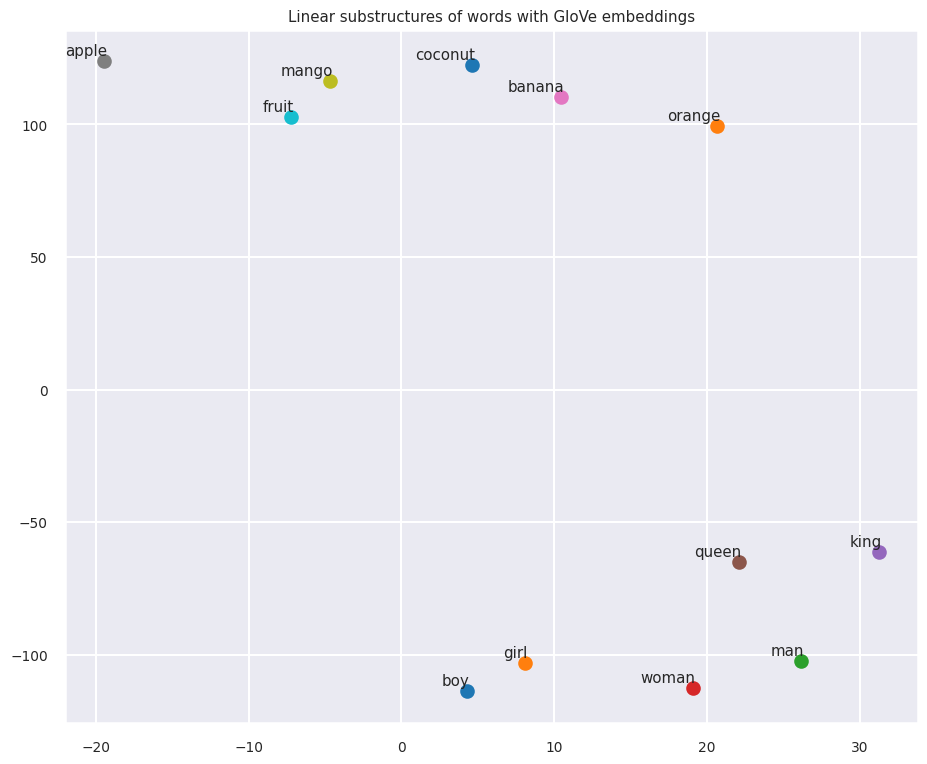

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk",  font_scale=0.6)

vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def glove_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42) #T-distributed Stochastic Neighbor Embedding
    # coordinates = tsne_model.fit_transform(wordvecs) #The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
    coordinates = tsne_model.fit_transform(np.array(wordvecs))

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])


    plt.figure(figsize=(11,9))
    plt.title('Linear substructures of words with GloVe embeddings')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

glove_plot(model)